# 5. Decision trees 

## Classification with decision trees

In module 3 we have learned to solve classification problems with the kNN algorithm. However, there are many other alternatives to choose from when building classifiers. One useful option is a family of algorithms referred to as decision trees.

When contacting a company's customer service by phone, one is often subjected to a series of questions ("Are you a private or business client?" etc.), and asked to perform selections according to the nature of the problem behind the phone call. Having given answers to these questions, the caller is finally directed to the appropriate service person with the necessary expertise to help solving the problem. This is essentially what happens when using decision trees as classifiers: the tree consists of a succession of questions concerning the values of the samples' input features. The answers to these questions determine the route followed by the sample within the tree structure, ending with the final prediction concerning its target class. 

As an example, we once more use the iris dataset, and build a decision tree classifier. In the following we download the dataset, preprocess the data into input and target tensors, and extract a test set for validation. The training set consists of 112 samples, and the remaining 38 form the test set. 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('datasets/iris/iris.csv')
X = df.drop(['species'], axis = 1) # input features
y = df['species'].astype('category') # target features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20) # extract test set
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


Building a decision tree using Scikit-learn library is an easy task: first, one creates an instance of `DecisionTreeClassifier` class, and then trains it with its `fit` method. The optional parameter `max_depth` restricts the size of the resulting tree structure. 

In [3]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2, random_state=20)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=20)

Now that the classifier has been constructed, its structure can be easily visualized with Matplotlib:

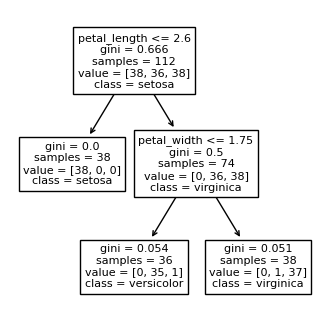

In [4]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize = (4, 4))
tree.plot_tree(model, feature_names = X.keys(), class_names = ['setosa', 'versicolor', 'virginica'])

plt.show()

The uppermost node of the tree is the **root** node, and defines the first question about the sample. In this particular tree, the question refers to the value of the `petal_length` variable: is the value for the sample under consideration less than or equal to 2,6 cm? Depending on the Boolean-type answer to this question (True/False), the sample is directed to one of the two alternative routes. If 'True', the tree immediately terminates and reaches a **leaf** with the predicted target class of 'setosa'. In our training set, this happens with 38 samples out of the total of 112 samples, and all of them also turn out to have 'setosa' as their true class label.

The remaining 74 samples, for which the root question returns 'False', are subjected to a further question before the final prediction: in this node, the question concerns the value of the variable `petal_width`. Depending on whether this value is less than or equal to 1,75 cm, the target class is predicted to be either 'versicolor' or 'virginica', respectively. Note that two of the 112 samples in the training set end up with false predictions with this classifier: one of the 36 samples with the predicted class 'versicolor' are actually of type 'virginica', and one of the 38 samples with the predicted class 'virginica' are actually of type 'versicolor'. This classifier then has the *training set* accuracy of 110/112 $\approx$ 0,98.

This simple example emphasizes the main advantage of using decision trees as classifiers: they are extremely transparent, and their operation can be easily interpreted. The most important input features are also easily recognized: in this example, just knowing the petal length and the petal width appears to be enough for the purpose of predicting the target class fairly well, at least within the training set. However, as discussed in the previous module, the performance of a classifier should never be estimated with the training set, but instead with new samples in the test set - that is, samples the model has not been exposed to during training. This validation is performed in the code cell below.

In [5]:
from sklearn.metrics import accuracy_score

predicted = model.predict(X_test)
accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8947368421052632


As it turns out, the accuracy of this simple classifier is not quite as impressive as it appeared. Let us also check out the corresponding confusion matrix for the test set:

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predicted, y_test)

array([[12,  0,  0],
       [ 0, 14,  4],
       [ 0,  0,  8]], dtype=int64)

Four of the 38 samples in the test set end up with false target class predictions with the model.